In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('twitch_log.tsv', sep='\t', header=None)
df.tail()

,0,1,2,3,4
424200,하다___ (hadaramg0125),[다이어트3일차] 많이 밀어보자 근데 이제 내가 밀고싶은만큼을 곁들인,시청자 82명,The Witcher 3: Wild Hunt,2022-10-27 09:05:04.063769
424201,잔양1 (zanyang),전장 부계 자다 깨서 몇판,시청자 79명,Hearthstone,2022-10-27 09:05:04.063769
424202,난현__ (nanhyeon),지금 아니면 못보는 방송 ヾ(•ω•`)o,시청자 78명,Just Chatting,2022-10-27 09:05:04.063769
424203,고먐잉 (rhaia11),목요일,시청자 76명,Just Chatting,2022-10-27 09:05:04.063769
424204,루시멜로 (lucimallow),[루루🐥] ㅠㅠ무극 말 없어졌어어으ㅠㅠㅜㅠㅜㅠㅜ,시청자 75명,Lost Ark,2022-10-27 09:05:04.063769


In [4]:
df.columns = ['이름', '제목','시청자수','카테고리','일시']

### 시청자수 전처리

In [5]:
df['시청자수'] = df['시청자수'].str.replace('시청자 ', '')
df['시청자수'] = df['시청자수'].str.replace('명', '')
df['시청자수'] = df['시청자수'].str.replace(',', '')
df.head()

,이름,제목,시청자수,카테고리,일시
0,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:02:22.436272
1,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),9687,Just Chatting,2022-09-27 19:02:22.436272
2,비챤_ (viichan6),6시) VRC 풀트뱅 ~!,9491,VRChat,2022-09-27 19:02:22.436272
3,한동숙 (handongsuk),발낳대 스크림,8103,VALORANT,2022-09-27 19:02:22.436272
4,괴물쥐123 (tmxk319),발낳대 전 스크림,8098,VALORANT,2022-09-27 19:02:22.436272


In [6]:
df1 = df[df['시청자수'].str.find('만') > 0]
df1

,이름,제목,시청자수,카테고리,일시
0,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:02:22.436272
49,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:05:04.699268
50,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),1만,Just Chatting,2022-09-27 19:05:04.699268
98,우왁굳 (woowakgood),축구왕 왁돌이,1.4만,FIFA 23,2022-09-27 19:10:04.966996
99,한동숙 (handongsuk),발낳대 스크림,1만,VALORANT,2022-09-27 19:10:04.966996
...,...,...,...,...,...
421355,한동숙 (handongsuk),원신,1.1만,Genshin Impact,2022-10-27 04:25:04.277984
421405,한동숙 (handongsuk),원신,1만,Genshin Impact,2022-10-27 04:30:04.090540
421455,한동숙 (handongsuk),원신,1만,Genshin Impact,2022-10-27 04:35:04.074495
421505,한동숙 (handongsuk),원신,1만,Genshin Impact,2022-10-27 04:40:04.048341


In [7]:
df2 = df1['시청자수'].str.replace('만', '').astype(float)*10000 + 500
df2

0         14500.0
49        14500.0
50        10500.0
98        14500.0
99        10500.0
           ...   
421355    11500.0
421405    10500.0
421455    10500.0
421505    10500.0
421555    10500.0
Name: 시청자수, Length: 12090, dtype: float64

In [8]:
df3 = df['시청자수']
df3 = df3.str.replace(',', '')
# # df[df3.str.find('L')>1]
# df3.iloc[:6687]
# df.iloc[6680:6690]

In [9]:
df.loc[df2.index, '시청자수'] = df2

In [10]:
# df.drop(6684, inplace=True)
df.drop(7190, inplace=True)

In [11]:
df.drop(df[df['시청자수'] == 'League of Legends'].index, inplace=True)
df.drop(df[df['시청자수'].isnull()].index, inplace=True)

In [12]:
df['시청자수'].iloc[7190:7200].astype(float)
df['시청자수']

0         14500.0
1            9687
2            9491
3            8103
4            8098
           ...   
424200         82
424201         79
424202         78
424203         76
424204         75
Name: 시청자수, Length: 424183, dtype: object

In [13]:
df['시청자수'] = df['시청자수'].astype(int)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424183 entries, 0 to 424204
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   이름      424183 non-null  object
 1   제목      424183 non-null  object
 2   시청자수    424183 non-null  int32 
 3   카테고리    424183 non-null  object
 4   일시      424183 non-null  object
dtypes: int32(1), object(4)
memory usage: 17.8+ MB


In [15]:
df.head()

,이름,제목,시청자수,카테고리,일시
0,우왁굳 (woowakgood),축구왕 왁돌이,14500,FIFA 23,2022-09-27 19:02:22.436272
1,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),9687,Just Chatting,2022-09-27 19:02:22.436272
2,비챤_ (viichan6),6시) VRC 풀트뱅 ~!,9491,VRChat,2022-09-27 19:02:22.436272
3,한동숙 (handongsuk),발낳대 스크림,8103,VALORANT,2022-09-27 19:02:22.436272
4,괴물쥐123 (tmxk319),발낳대 전 스크림,8098,VALORANT,2022-09-27 19:02:22.436272


In [16]:
df1 = df

In [19]:
name = df1.groupby('이름').mean().sort_values('시청자수', ascending=False)[:20]
name

,시청자수
이름,
LCK_Korea,47747.763810
우왁굳 (woowakgood),16252.337553
한동숙 (handongsuk),14591.082276
풍월량 (hanryang1125),14506.202183
enchantenter,13679.462585
아이네_ (vo_ine),12471.908784
랄로 (aba4647),11229.294931
양띵 (yd0821),9978.756233
릴파_ (lilpaaaaaa),9932.240441


In [20]:
df2 = df1.set_index('이름')
df3 = df2.loc[name.index]
df3

,제목,시청자수,카테고리,일시
이름,,,,
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:00:05.647274
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:05:05.461526
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:10:05.154451
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:15:05.314280
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:20:07.268227
...,...,...,...,...
오킹 (obm1025),대장정 8일차 전라도 입성 목표,5068,Just Chatting,2022-10-27 08:45:04.044642
오킹 (obm1025),대장정 8일차 전라도 입성 목표,5175,Just Chatting,2022-10-27 08:50:04.076074
오킹 (obm1025),대장정 8일차 전라도 입성 목표,5331,Just Chatting,2022-10-27 08:55:04.051693


In [21]:
df3.index

Index(['LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea',
       'LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea',
       ...
       '오킹 (obm1025)', '오킹 (obm1025)', '오킹 (obm1025)', '오킹 (obm1025)',
       '오킹 (obm1025)', '오킹 (obm1025)', '오킹 (obm1025)', '오킹 (obm1025)',
       '오킹 (obm1025)', '오킹 (obm1025)'],
      dtype='object', name='이름', length=24685)

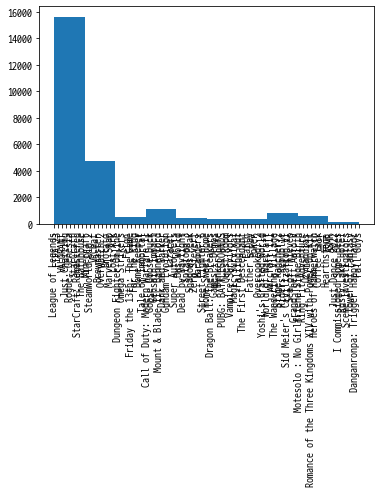

In [22]:
import matplotlib.pyplot as plt
# 한글 처리
from matplotlib import rc
rc('font', family='D2Coding')

plt.xticks(rotation="vertical")
plt.hist(df3['카테고리'])
plt.show()

In [23]:
df_p = df[df['이름']=='풍월량 (hanryang1125)']
df_p

,이름,제목,시청자수,카테고리,일시
919,풍월량 (hanryang1125),풍월량,1370,Just Chatting,2022-09-27 20:30:06.475437
968,풍월량 (hanryang1125),풍월량,1487,Just Chatting,2022-09-27 20:35:04.698807
995,풍월량 (hanryang1125),풍월량,5337,Just Chatting,2022-09-27 20:40:04.733223
1045,풍월량 (hanryang1125),풍월량,6279,Just Chatting,2022-09-27 20:45:05.376154
1093,풍월량 (hanryang1125),풍월량,7055,Just Chatting,2022-09-27 20:50:04.643354
...,...,...,...,...,...
420706,풍월량 (hanryang1125),아내와 아들을 잃은 아버지 공포게임 Father's Day 풍월량,10500,Father's Day,2022-10-27 03:20:04.468614
420756,풍월량 (hanryang1125),아내와 아들을 잃은 아버지 공포게임 Father's Day 풍월량,10500,Father's Day,2022-10-27 03:25:04.895545
420806,풍월량 (hanryang1125),풍월량,9414,Just Chatting,2022-10-27 03:30:05.358596
420856,풍월량 (hanryang1125),풍월량,9021,Just Chatting,2022-10-27 03:35:05.001006


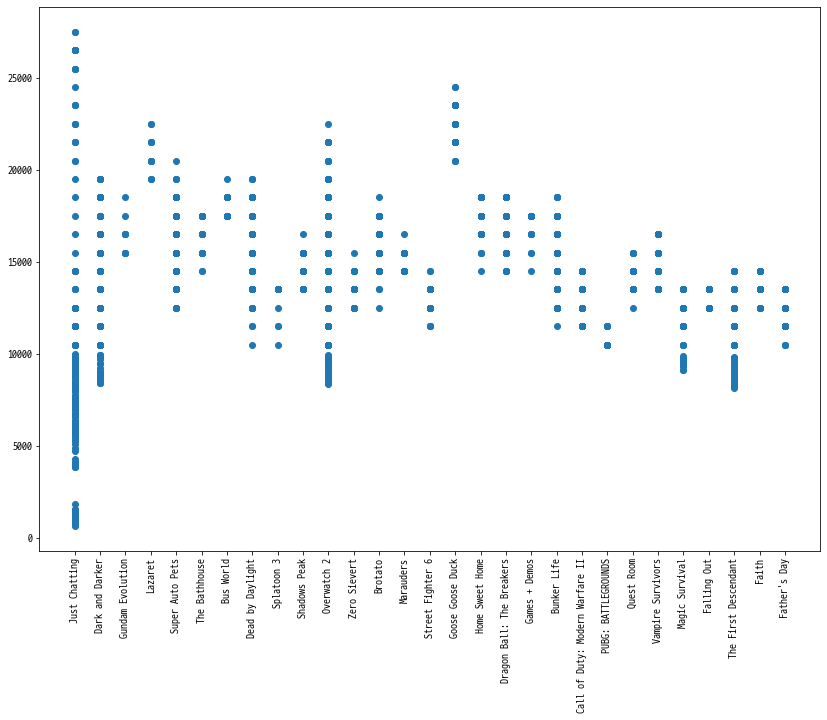

In [24]:
plt.figure(figsize=(14,10))
plt.xticks(rotation="vertical")
plt.scatter(df_p['카테고리'], df_p['시청자수'])

(array([346., 143., 223., 409., 125., 140., 160., 126., 117., 135.]),
 array([ 0. ,  2.8,  5.6,  8.4, 11.2, 14. , 16.8, 19.6, 22.4, 25.2, 28. ]),
 <BarContainer object of 10 artists>)

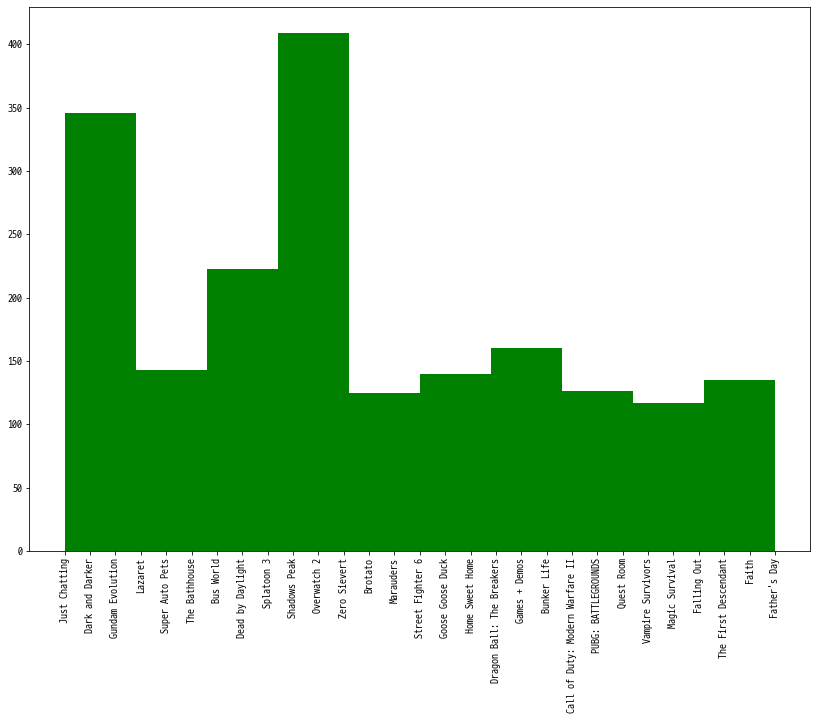

In [25]:
plt.figure(figsize=(14,10))
plt.xticks(rotation='vertical')
plt.hist(df_p['카테고리'], color='g' )

In [26]:
df_p['카테고리'].value_counts()

Overwatch 2                        342
Just Chatting                      197
Dead by Daylight                   158
Dark and Darker                    139
Super Auto Pets                    102
Call of Duty: Modern Warfare II     82
Bunker Life                         75
Brotato                             72
Dragon Ball: The Breakers           64
Goose Goose Duck                    62
The First Descendant                58
Home Sweet Home                     55
Marauders                           53
Faith                               45
Magic Survival                      43
Shadows Peak                        43
Falling Out                         40
Bus World                           36
Vampire Survivors                   34
Father's Day                        32
Splatoon 3                          29
The Bathhouse                       27
Quest Room                          24
Zero Sievert                        24
Street Fighter 6                    23
Games + Demos            

### 시간대별로 집계할 수 있도록 전처리하자